# 1. Look at the Big Picture

## 1.1 Frame the Problem

* What is the business objective? => Clarify median house price based on pop, medidan income
* Is it supervised/unsupervised problem?
* Is it classification/regression problem?
* Is it batch/online learning task?

## 1.2 Select a Performance Measure

* For `supervised regression` task, the performance measure are:
* * RMSE
* * MSE (for normal distributed)
* * MAE (for outliers)

## 1.3 Check the Assumptions

* Perhaps, this is a classification task to distinct cheap, medium, and expensive house prices
* Recheck the business objective

# 2. Get the Data

## 2.1 Create the Workspace

* Check all the installation requirements for your project
* Import the dependencies you will work with

## 2.2 Download the Data

* Don't write a script to download targz/tgz file. Just do in your own
* You can load tar file extension in csv format directly withou any fetching

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('housing_data.tar')

## 2.3 Take a Quick Look at the Data Structure

In [3]:
data.head()

,housing.csv,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#download error by me

data.rename(columns={'housing.csv': 'longitude'}, inplace=True)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#categorical column
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
#numerical column
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


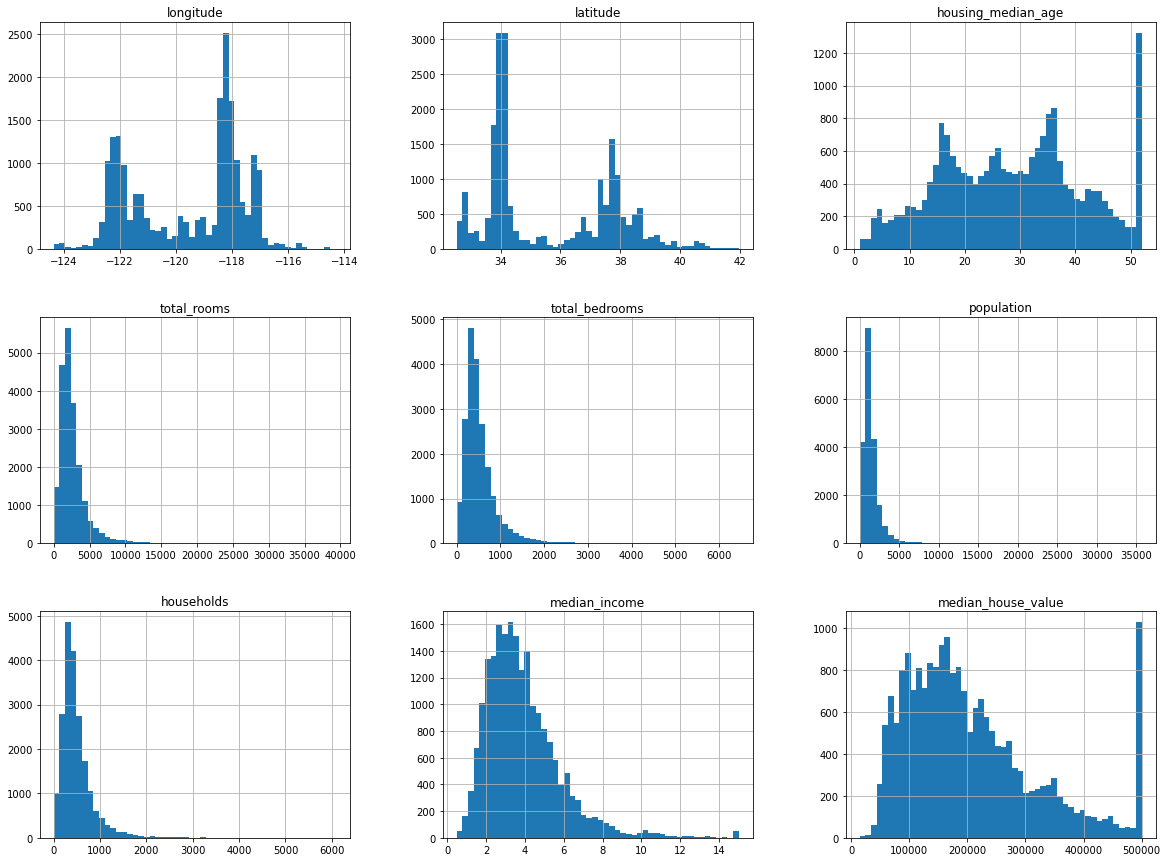

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20, 15))
plt.show()

## 2.4 Create a Test Set

In [9]:
def split_train_test(data, test_ratio):
    shuffled_indicies = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
#alternatively
from sklearn.model_selection import train_test_split

#random sampling but we need 'staratified' sampling data without bias for test_set
train_set, test_set = train_test_split(data, test_size=0.2, random_state=21)

### 2.4.1 Stratified sampling
* Based on discretized medain income
* median income is the key feature for house prediction

In [11]:
#discretizing median_income
data['income_cat'] = pd.cut(data['median_income'],
                            bins=[0., 1.5, 3., 4.5, 6., np.inf],
                            labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

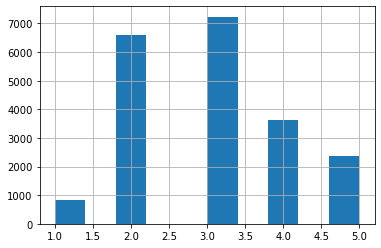

In [12]:
data['income_cat'].hist()

In [13]:
data.drop('income_cat', axis=1, inplace=True)

In [14]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 3. Discover and Visualize the Data to Gain Insights

In [15]:
housing = train_set.copy()

## 3.1 Visualizing Geographical Data

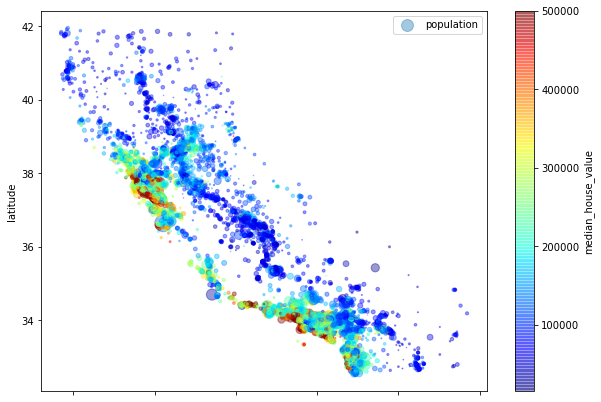

In [16]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10, 7),
            c='median_house_value',
            cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

## 3.2 Looking for Correlations

In [17]:
corr_matrix = housing.corr()
#correlation towards target feature
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686358
total_rooms           0.134286
housing_median_age    0.105342
households            0.065234
total_bedrooms        0.049844
population           -0.025010
longitude            -0.049219
latitude             -0.139209
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

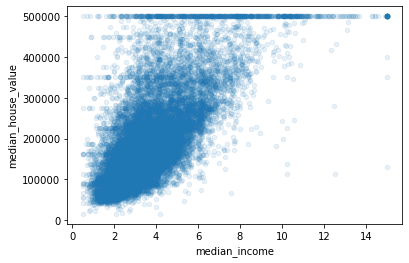

In [18]:
#promising is 'median income'
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

## 3.3 Experimenting with Attribute Combinations

In [19]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['pop_per_household'] = housing['population'] / housing['households']

In [20]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.686358
rooms_per_household    0.155572
total_rooms            0.134286
housing_median_age     0.105342
households             0.065234
total_bedrooms         0.049844
pop_per_household     -0.022283
population            -0.025010
longitude             -0.049219
latitude              -0.139209
bedrooms_per_room     -0.259442
Name: median_house_value, dtype: float64

# 4. Prepare the Data for Machine Learning Algorithms

In [21]:
housing_features = train_set.drop('median_house_value', axis=1)
housing_labels = train_set['median_house_value'].copy()

## 4.1 Data Cleaning (Feature Imputation)

In [22]:
#option 3
#handling missing values in 'total_bedrooms' column

median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median, inplace=True)

In [23]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 6279 to 15305
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            16511 non-null  float64
 1   latitude             16511 non-null  float64
 2   housing_median_age   16511 non-null  float64
 3   total_rooms          16511 non-null  float64
 4   total_bedrooms       16512 non-null  float64
 5   population           16511 non-null  float64
 6   households           16511 non-null  float64
 7   median_income        16511 non-null  float64
 8   median_house_value   16511 non-null  float64
 9   ocean_proximity      16511 non-null  object 
 10  rooms_per_household  16511 non-null  float64
 11  bedrooms_per_room    16341 non-null  float64
 12  pop_per_household    16511 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


## 4.2 Handling Text and Categorical Attributes

In [24]:
housing_cat = housing['ocean_proximity']
housing_cat.head()

6279     <1H OCEAN
10019       INLAND
3794     <1H OCEAN
162       NEAR BAY
7864     <1H OCEAN
Name: ocean_proximity, dtype: object

In [25]:
from sklearn.preprocessing import OneHotEncoder

housing_cat = np.array(housing_cat).reshape(-1, 1)

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [26]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN', nan],
       dtype=object)]

## 4.3 Feature Scaling
* Normalization (range 0-1) => MinMaxScaler
* Standarization robust for outliers => StandardScaler

## 4.4 Transformation Pipelines

### 4.4.1 Numerical features

In [27]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler

# num_pipeline = Pipeline([
#     ('std_scaler', StandarScaler())
# ])

# housing_num_tr = num_pipeline.fit_transform()

### 4.4.2 Universal Transformer for both Numerical and Categorical features
* You can go to Kaggle with this

In [28]:
# from sklearn.compose import ColumnTransformer

# num_features = list(housing_num)
# cat_features = list(housing_cat)

# full_pipeline = ColumnTransformer([
#     ('num', num_pipeline, num_features)
#     ('cat', OneHotEncoder(), cat_features)
# ])

# housing_prepared = full_pipeline.fit_transform(housing)

# 5. Select and Train a Model

In [29]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 6279 to 15305
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16511 non-null  float64
 1   latitude            16511 non-null  float64
 2   housing_median_age  16511 non-null  float64
 3   total_rooms         16511 non-null  float64
 4   total_bedrooms      16341 non-null  float64
 5   population          16511 non-null  float64
 6   households          16511 non-null  float64
 7   median_income       16511 non-null  float64
 8   median_house_value  16511 non-null  float64
 9   ocean_proximity     16511 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [30]:
median = train_set['total_bedrooms'].median()
train_set['total_bedrooms'].fillna(median, inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [31]:
dummies = pd.get_dummies(train_set['ocean_proximity'])
dummies

train_set = pd.concat([train_set, dummies], axis=1)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6279,-117.95,34.02,22.0,1919.0,411.0,1203.0,363.0,4.2578,144100.0,<1H OCEAN,1,0,0,0,0
10019,-121.18,39.19,16.0,1528.0,351.0,729.0,319.0,2.4688,138800.0,INLAND,0,1,0,0,0
3794,-118.37,34.16,40.0,1973.0,382.0,774.0,352.0,4.4122,282300.0,<1H OCEAN,1,0,0,0,0
162,-122.24,37.81,52.0,2513.0,502.0,1048.0,518.0,3.6750,269900.0,NEAR BAY,0,0,0,1,0
7864,-118.12,33.89,22.0,6876.0,1960.0,5162.0,1879.0,2.9293,170800.0,<1H OCEAN,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16432,-121.23,38.12,22.0,393.0,58.0,134.0,57.0,3.9500,178100.0,INLAND,0,1,0,0,0
8964,-118.39,33.99,43.0,612.0,135.0,402.0,142.0,5.1322,314900.0,<1H OCEAN,1,0,0,0,0
5944,-117.88,34.13,33.0,3713.0,718.0,2106.0,720.0,4.0023,185500.0,<1H OCEAN,1,0,0,0,0
5327,-118.45,34.04,22.0,3319.0,1045.0,1848.0,940.0,3.6673,283300.0,<1H OCEAN,1,0,0,0,0


In [32]:
train_set.drop('ocean_proximity', axis=1, inplace=True)

In [33]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 6279 to 15305
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16511 non-null  float64
 1   latitude            16511 non-null  float64
 2   housing_median_age  16511 non-null  float64
 3   total_rooms         16511 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16511 non-null  float64
 6   households          16511 non-null  float64
 7   median_income       16511 non-null  float64
 8   median_house_value  16511 non-null  float64
 9   <1H OCEAN           16512 non-null  uint8  
 10  INLAND              16512 non-null  uint8  
 11  ISLAND              16512 non-null  uint8  
 12  NEAR BAY            16512 non-null  uint8  
 13  NEAR OCEAN          16512 non-null  uint8  
dtypes: float64(9), uint8(5)
memory usage: 1.3 MB


In [34]:
features = train_set.drop('median_house_value', axis=1)
labels = train_set['median_house_value'].copy()

In [35]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 6279 to 15305
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16511 non-null  float64
 1   latitude            16511 non-null  float64
 2   housing_median_age  16511 non-null  float64
 3   total_rooms         16511 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16511 non-null  float64
 6   households          16511 non-null  float64
 7   median_income       16511 non-null  float64
 8   <1H OCEAN           16512 non-null  uint8  
 9   INLAND              16512 non-null  uint8  
 10  ISLAND              16512 non-null  uint8  
 11  NEAR BAY            16512 non-null  uint8  
 12  NEAR OCEAN          16512 non-null  uint8  
dtypes: float64(8), uint8(5)
memory usage: 1.2 MB


In [36]:
labels.head()

6279     144100.0
10019    138800.0
3794     282300.0
162      269900.0
7864     170800.0
Name: median_house_value, dtype: float64

## 5.1 Training and Evaluating on the Training Set

### 5.1.1 Linear Model

In [37]:
#DF => NumPy array for sklearn
features = features.values
labels = labels.values

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(features, labels)

In [ ]:
from sklearn.metrics import mean_squared_error

housing_pred = lin_reg.predict(features)
lin_mse = mean_squared_error(housing_pred, housing_labels)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

### 5.1.2 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(features, labels)

In [ ]:
housing_pred = tree_reg.predict(features)
tree_mse = mean_squared_error(housing_pred, labels)
tree_rmse = np.sqrt(tree_mse)
tree_mse

## 5.2 Better Evaluation Using K-Fold Cross-Validation

In [ ]:
#For DT

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, features, labels,
                         scoring='neg_mean_squared_error', cv=10)
# 10 validation set scores (10% of entire training set)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def scores_display(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())
    
scores_display(tree_rmse_scores)

In [ ]:
#for LR
lin_scores = cross_val_score(lin_reg, features, labels,
                             scoring='neg_mean_squared_error', cv=10)
lin_rmse = np.sqrt(-lin_scores)
score_display(lin_rmse)

### 5.2.1 RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RanomForestRegressor()
forest_reg.fit(features, labels)

forest_pred = forest_reg.predict(features)
forest_mse = mean_squared_error(forest_pred, labels)
forest_rmse = np.sqrt(forest_mse)
#forest RMSE on train set (usually lower than validation set)
forest_rmse

In [ ]:
forest_scores = cross_val_score(forest_reg, features, labels,
                                scoring='neg_mean_squared_error', cv=10)
forest_rmse = np.sqrt(-forest_scores)

score_display(forest_scores)

## 5.3 Saving trained models

In [ ]:
import joblib

#saving
joblib.dump(forest_reg, '06_forest.pkl')


#loading
my_forest = joblib.load('06_forest.pkl')

# 6. Fine-Tune Your Model

## 6.1 Grid Search
* GridSearch includes a cross-validation set

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': False, 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [ ]:
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(features, labels)
# (3x4 + 2x3) x 5 = 90 models training

In [ ]:
#best parameters form the grid search
grid_search.best_params_

In [ ]:
#alternatively
#dict keys on param grid should be identical with model's hyperparams names
grid_search.best_estimator_

## 6.2 Randomized Search

In [ ]:
random_search = RandomizedSearchCV(forest_reg, param_grid, cv=5,
                                   scoring='neg_mean_squared_error',
                                   return_train_score=True)

## 6.3 Ensemble Methods
* Group of models always perform best than individual models

## 6.4 Analyze the Best Models and Their Errors

## 6.5 Evaluate Your System on the Test Set

In [ ]:
final_model = grid_search.best_estimator_

X_test = test_set.drop('median_house_value', axis=1)
y_test = test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse
#47,600

### TRANSFORMER

In [ ]:
from sklearn.compose import ColumnTransformer

num_features = list(data_num)
cat_features = ['cat_feature']

full_pipeline = ColumnTransformer([
    ('numerical', num_pipeline, num_features),
    ('categorical', cat_pipeline, cat_features)
])

features_prepared = full_pipeline.fit_transform(features)